# Assignment-04-Simple Linear Regression-1 Delivery Time 

Q1) Delivery_time $\rightarrow$ Predict delivery time using sorting time 
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using Python.

**Import the libraries needed**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

**Import the data set given

In [2]:
dataset=pd.read_csv('delivery_time.csv')
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## EDA and Data Visualization

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


`distplot` will be removed in future versions so better to use `sns.displot` inorder to create the same old style plot give the parameter `kde=true` for `displot`
Furtehre doubts refer to: 
[Announcing the release of seaborn](https://michaelwaskom.medium.com/announcing-the-release-of-seaborn-0-11-3df0341af042) medium article.
[Emulating distplot in seaborn](https://stackoverflow.com/questions/67638590/emulating-deprecated-seaborn-distplots) stackoverflow query.

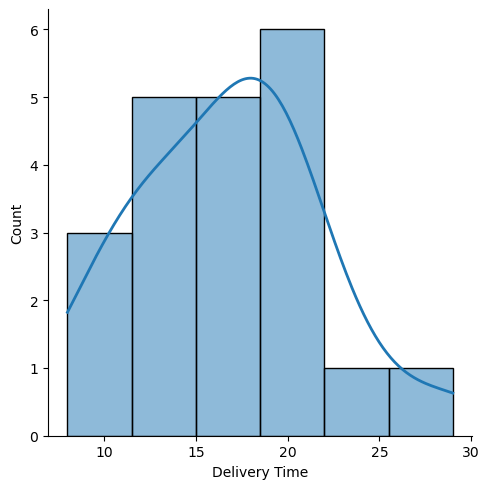

In [4]:
# Default visualization opition.
# The following function is a replacement of `distplot` form previous versions.
sns.displot(dataset['Delivery Time'], kind="hist", kde=True, line_kws={'lw': 2, 'color': 'red'} )

<AxesSubplot: xlabel='Delivery Time', ylabel='Density'>

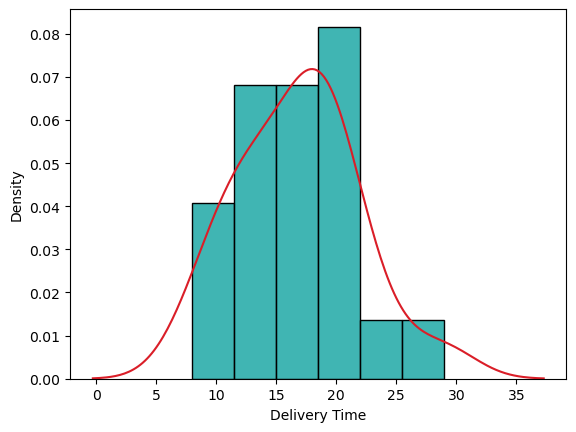

In [5]:
# Visualization beautified.
sns.histplot(dataset['Delivery Time'], stat="density", fill=True, color ='#009d9a') 
sns.kdeplot(dataset['Delivery Time'], color="#da1e28")
# sns.histplot(dataset['Delivery Time'], bins=6, binrange=(0,30), stat="density", fill=True, color ='#009d9a') 
# with above command we can specify the bin range and number of bins according to our needs.

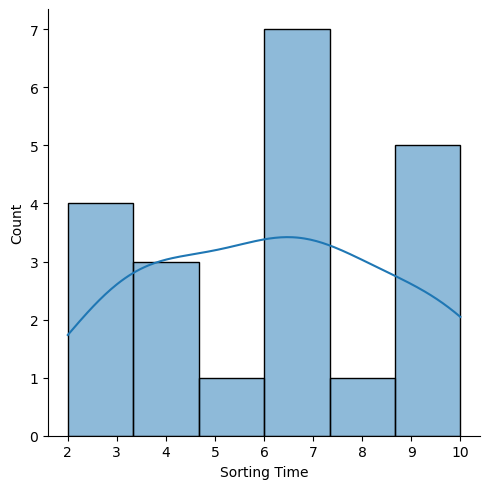

In [6]:
# Default visualization opition.
# The following function is a replacement of `distplot` form previous versions.
sns.displot(dataset['Sorting Time'], kind="hist", kde=True,)

<AxesSubplot: xlabel='Sorting Time', ylabel='Density'>

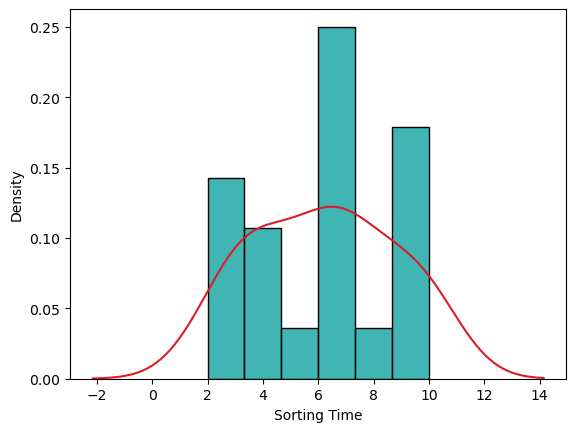

In [7]:
# Visualization beautified.
sns.histplot(dataset['Sorting Time'], stat="density", fill=True, color ='#009d9a') 
sns.kdeplot(dataset['Sorting Time'], color="#da1e28")

## Feature Engineering

**Renaming Columns**
It is important to rename the columns name with spaces in them with '_' as python variable should not be named with spaces.


In [8]:
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## Correlation Analysis

**Finding Co-relation between delivery time and sorting time**


In [9]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot: xlabel='sorting_time', ylabel='delivery_time'>

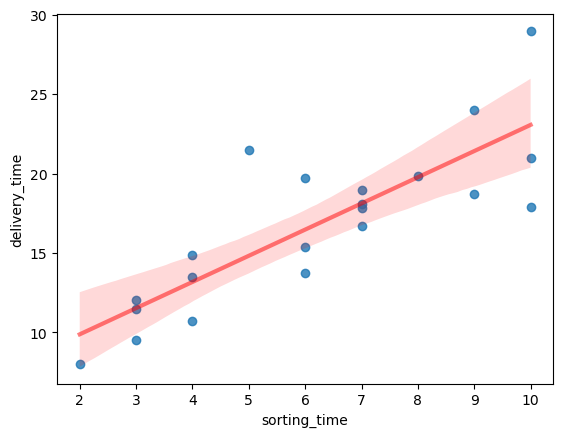

In [10]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'], line_kws={"color":"r","alpha":0.5,"lw":3} )
# line_kws corresponds to regression line and its attributes are mentioned inside.
# alpha value corresponds to the transperency of the line.

## Model Building

In [11]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

*The above command tries to fit the line in such a way we get tie least square value as low as possible.**

## Model Testing

**We will find the slope and the intercept value of the line fit to the data.**

In [12]:
# Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

**Equation of regression line $y = 1.649020x + 6.582734$ **

In [13]:
# t-values and p-values
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [14]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

## Model Predictions

In [15]:
# Manual prediction for say sorting time 7
delivery_time = (6.582734) + (1.649020)*(7)
delivery_time

18.125874

In [16]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,7,8])
new_data

0    5
1    7
2    8
dtype: int64

In [17]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,7
2,8


In [18]:
model.predict(data_pred)

0    14.827833
1    18.125873
2    19.774893
dtype: float64